In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns

In [12]:
german = pd.read_csv("../data sets/german.csv")

In [13]:
german

status  month credit_history purpose  credit_amount savings employment  \
0      A11      6            A34     A43           1169     A65        A75   
1      A12     48            A32     A43           5951     A61        A73   
2      A14     12            A34     A46           2096     A61        A74   
3      A11     42            A32     A42           7882     A61        A74   
4      A11     24            A33     A40           4870     A61        A73   
..     ...    ...            ...     ...            ...     ...        ...   
995    A14     12            A32     A42           1736     A61        A74   
996    A11     30            A32     A41           3857     A61        A73   
997    A14     12            A32     A43            804     A61        A75   
998    A11     45            A32     A43           1845     A61        A73   
999    A12     45            A34     A41           4576     A62        A71   

     investment_as_income_percentage personal_status other_debtors  ...  \
0                                  4             A93          A101  ...   
1                                  2             A92          A101  ...   
2                                  2             A93          A101  ...   
3                                  2             A93          A103  ...   
4                                  3             A93          A101  ...   
..                               ...             ...           ...  ...   
995                                3             A92          A101  ...   
996                                4             A91          A101  ...   
997                                4             A93          A101  ...   
998                                4             A93          A101  ...   
999                                3             A93          A101  ...   

     property age  installment_plans housing number_of_credits  skill_level  \
0        A121  67               A143    A152                 2         A173   
1        A121  22               A143    A152                 1         A173   
2        A121  49               A143    A152                 1         A172   
3        A122  45               A143    A153                 1         A173   
4        A124  53               A143    A153                 2         A173   
..        ...  ..                ...     ...               ...          ...   
995      A121  31               A143    A152                 1         A172   
996      A122  40               A143    A152                 1         A174   
997      A123  38               A143    A152                 1         A173   
998      A124  23               A143    A153                 1         A173   
999      A123  27               A143    A152                 1         A173   

    people_liable_for  telephone foreign_worker credit  
0                   1       A192           A201      1  
1                   1       A191           A201      2  
2                   2       A191           A201      1  
3                   2       A191           A201      1  
4                   2       A191           A201      2  
..                ...        ...            ...    ...  
995                 1       A191           A201      1  
996                 1       A192           A201      1  
997                 1       A191           A201      1  
998                 1       A192           A201      2  
999                 1       A191           A201      1  

[1000 rows x 21 columns]

## Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

credit: (1 = Good, 2 = Bad)

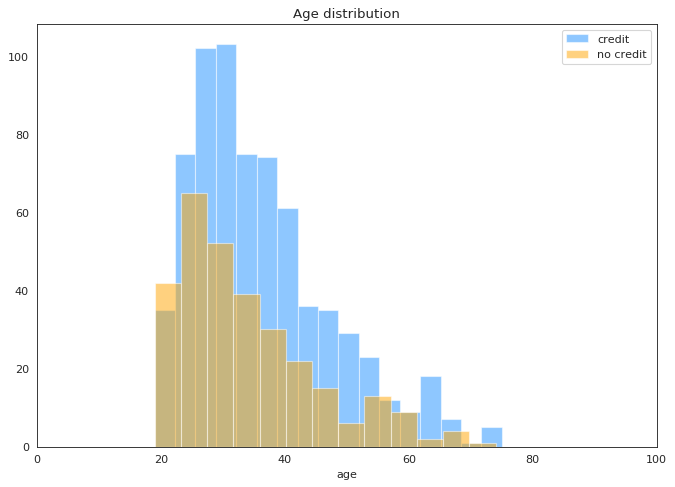

In [43]:
 sns.set_style("white")


# Import data
x1 = german.loc[german.credit==1, 'age']
x2 = german.loc[german.credit==2, 'age']


# Plot
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, kde=False, color="dodgerblue", label="credit", **kwargs)
sns.distplot(x2, kde=False, color="orange", label="no credit", **kwargs)
plt.title('Age distribution')
plt.xlim(0,100)
plt.legend();

#### derived gender from data

In [15]:
# Attribute 9: (qualitative) Personal status and sex 
#     A91 : male : divorced/separated 
#     A92 : female : divorced/separated/married 
#     A93 : male : single 
#     A94 : male : married/widowed 
#     A95 : female : single

males_total = (np.sum(german['personal_status'] == 'A91') + np.sum(german['personal_status'] == 'A93') 
               + np.sum(german['personal_status'] == 'A94'))
females_total = np.sum(german['personal_status'] == 'A92') + np.sum(german['personal_status'] == 'A95')

# check how many are a bad credit risk
bad_males = (np.sum((german['personal_status'] == 'A91') & (german['credit'] == 2)) 
               + np.sum((german['personal_status'] == 'A93') & (german['credit'] == 2)) 
               + np.sum((german['personal_status'] == 'A94') & (german['credit'] == 2)))
bad_females = (np.sum((german['personal_status'] == 'A92') & (german['credit'] == 2)) 
               + np.sum((german['personal_status'] == 'A95') & (german['credit'] == 2)))

#### Analyze gender distribution

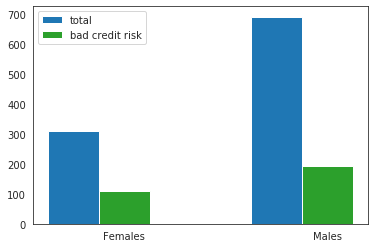

In [16]:
barWidth = .25

bars1 = [females_total, males_total]
bars2 = [bad_females, bad_males]
x_labels = ('Females', 'Males')
y_pos1 = np.arange(len(bars1))
y_pos2 = [x + barWidth for x in y_pos1]

plt.bar(y_pos1, bars1, color='tab:blue',  width=barWidth, edgecolor='white', label='total')
plt.bar(y_pos2, bars2, color='tab:green',  width=barWidth, edgecolor='white', label='bad credit risk')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

In [17]:
youth_total = np.sum(german['age'] < 25)
adult_total = np.sum(german['age'] >= 25)

# check how many are a bad credit risk
bad_youth = np.sum((german['age'] < 25) & (german['credit'] == 2)) 
bad_adult = np.sum((german['age'] >= 25) & (german['credit'] == 2)) 

#### discretize age into youth (< 25 years) and adult (>= 25 years)

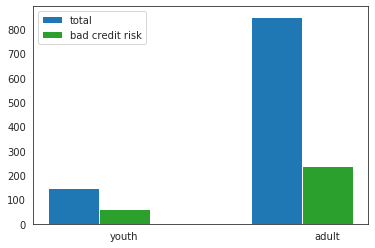

In [18]:
barWidth = .25

bars1 = [youth_total, adult_total]
bars2 = [bad_youth, bad_adult]
x_labels = ('youth', 'adult')
y_pos1 = np.arange(len(bars1))
y_pos2 = [x + barWidth for x in y_pos1]

plt.bar(y_pos1, bars1, color='tab:blue',  width=barWidth, edgecolor='white', label='total')
plt.bar(y_pos2, bars2, color='tab:green',  width=barWidth, edgecolor='white', label='bad credit risk')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

#### Start with analyzing the combined attributes
#### (youth-males, youth-females etc.)

In [34]:
youth_males = (np.sum((german['personal_status'] == 'A91') & (german['age'] < 25)) 
               + np.sum((german['personal_status'] == 'A93') & (german['age'] < 25)) 
               + np.sum((german['personal_status'] == 'A94') & (german['age'] < 25)))
bad_youth_males = (np.sum((german['personal_status'] == 'A91') & (german['credit'] == 2) & (german['age'] < 25)) 
                + np.sum((german['personal_status'] == 'A93') & (german['credit'] == 2) & (german['age'] < 25)) 
                + np.sum((german['personal_status'] == 'A94') & (german['credit'] == 2) & (german['age'] < 25)))
youth_females = (np.sum((german['personal_status'] == 'A92') & (german['age'] < 25)) 
                   + np.sum((german['personal_status'] == 'A95') & (german['age'] < 25)))
bad_youth_females = (np.sum((german['personal_status'] == 'A92') & (german['credit'] == 2) & (german['age'] < 25)) 
                   + np.sum((german['personal_status'] == 'A95') & (german['credit'] == 2) & (german['age'] < 25)))
adult_males = (np.sum((german['personal_status'] == 'A91') & (german['age'] >= 25)) 
               + np.sum((german['personal_status'] == 'A93') & (german['age'] >= 25)) 
               + np.sum((german['personal_status'] == 'A94') & (german['age'] >= 25)))
bad_adult_males = (np.sum((german['personal_status'] == 'A91') & (german['credit'] == 2) & (german['age'] >= 25)) 
               + np.sum((german['personal_status'] == 'A93') & (german['credit'] == 2) & (german['age'] >= 25)) 
               + np.sum((german['personal_status'] == 'A94') & (german['credit'] == 2) & (german['age'] >= 25)))
adult_females = (np.sum((german['personal_status'] == 'A92') & (german['age'] >= 25)) 
                 + np.sum((german['personal_status'] == 'A95') & (german['age'] >= 25)))
bad_adult_females = (np.sum((german['personal_status'] == 'A92') & (german['credit'] == 2) & (german['age'] >= 25)) 
                   + np.sum((german['personal_status'] == 'A95') & (german['credit'] == 2) & (german['age'] >= 25)))

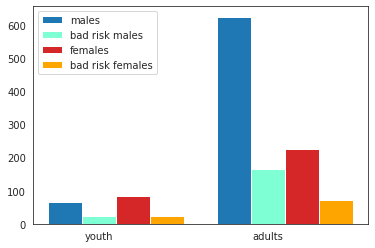

In [35]:
barWidth = .2

bars1 = [youth_males, adult_males]
bars2 = [bad_youth_males, bad_adult_males]
bars3 = [youth_females, adult_females]
bars4 = [bad_youth_males, bad_adult_females]

x_labels = ['youth', 'adults']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='aquamarine', width=barWidth, edgecolor='white', label='bad risk males')
plt.bar(r3, bars3, color='tab:red', width=barWidth, edgecolor='white', label='females')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='bad risk females')


plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()